In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bc_data = pd.read_csv("breast_cancer_data.csv")

In [4]:
bc_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


### EDA

We will now analyze the dataset. First, we will look for null and duplicate entries.

In [5]:
bc_data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [6]:
bc_data.duplicated().sum()

0

In [7]:
bc_data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

There are no null entries and duplicate entries in the dataset. Next, we will try to see if there are any correlations between the variables.

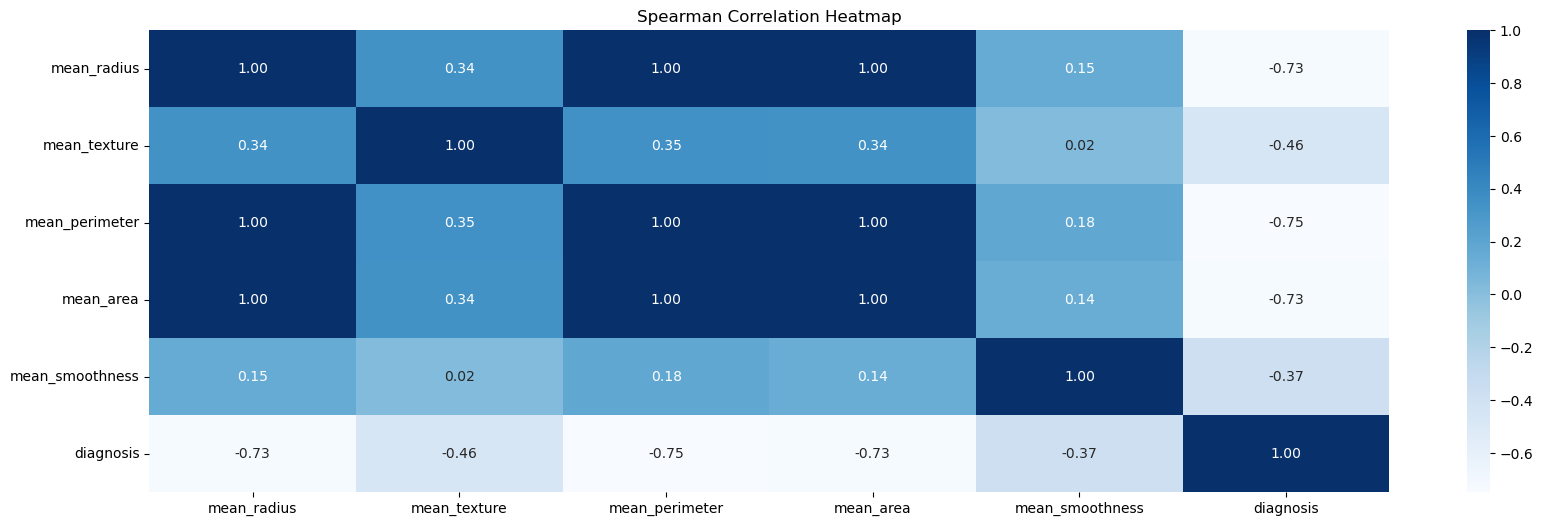

In [8]:
corr = bc_data.corr(method = 'spearman')
plt.figure(figsize=(20,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.title('Spearman Correlation Heatmap')
plt.show()

We will choose not to drop any columns. 

<Figure size 2000x1000 with 0 Axes>

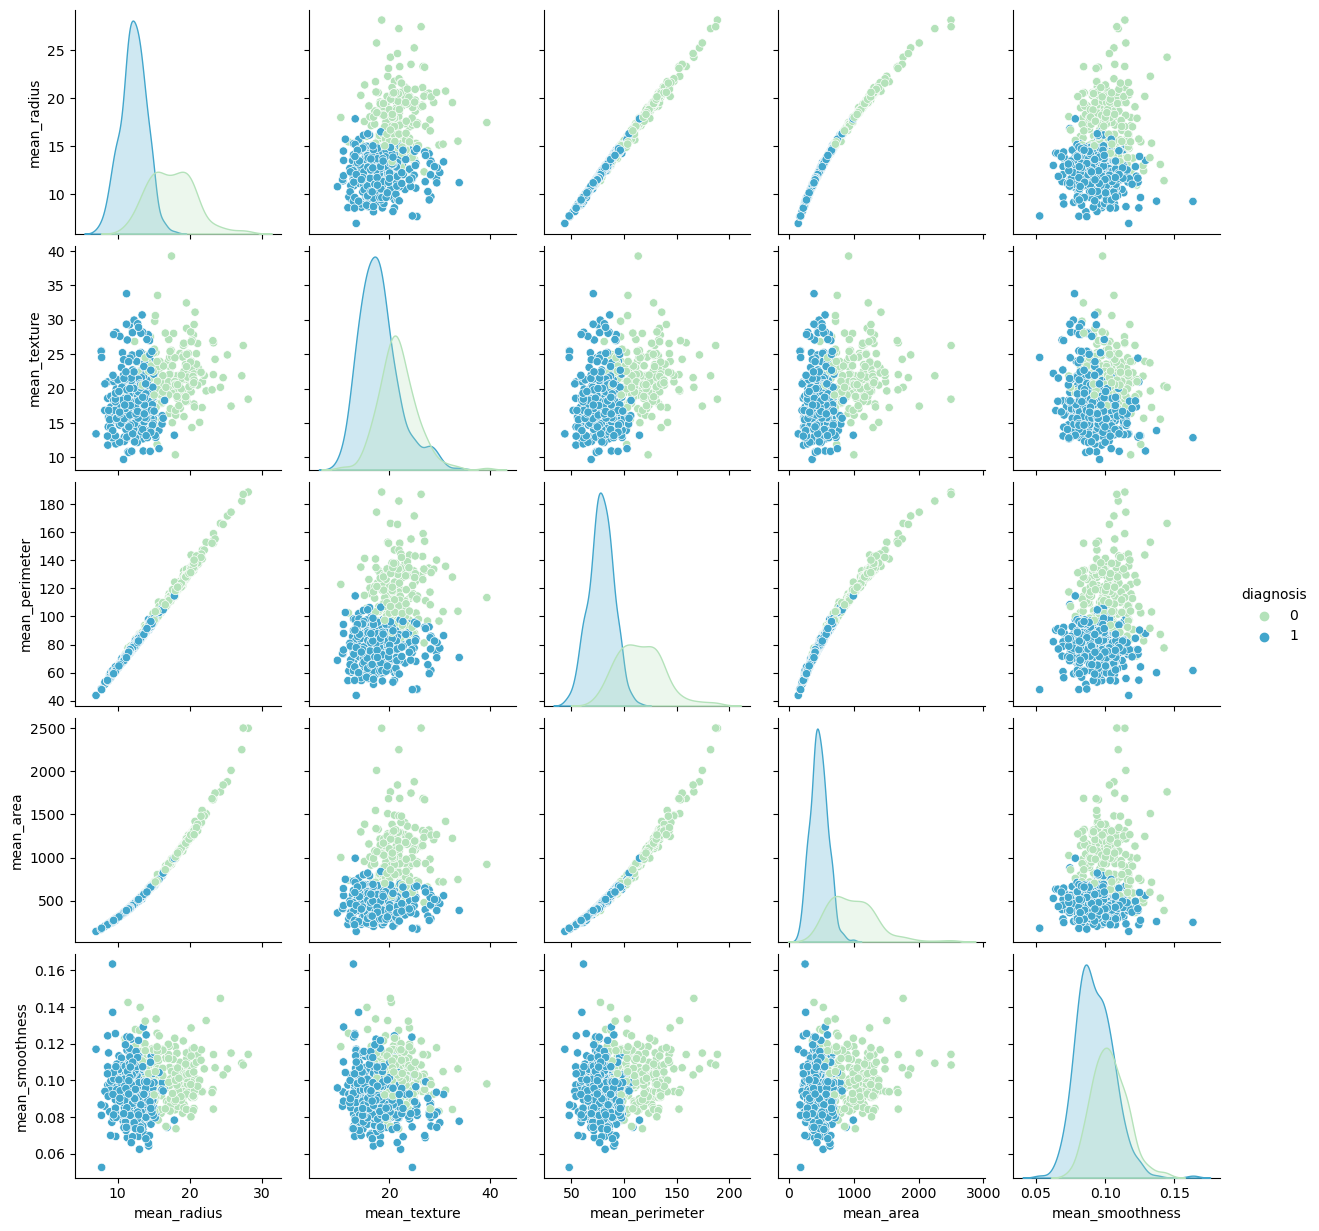

In [10]:
figure = plt.figure(figsize=(20,10))
sns.pairplot(bc_data, hue='diagnosis', palette='GnBu')
plt.show()

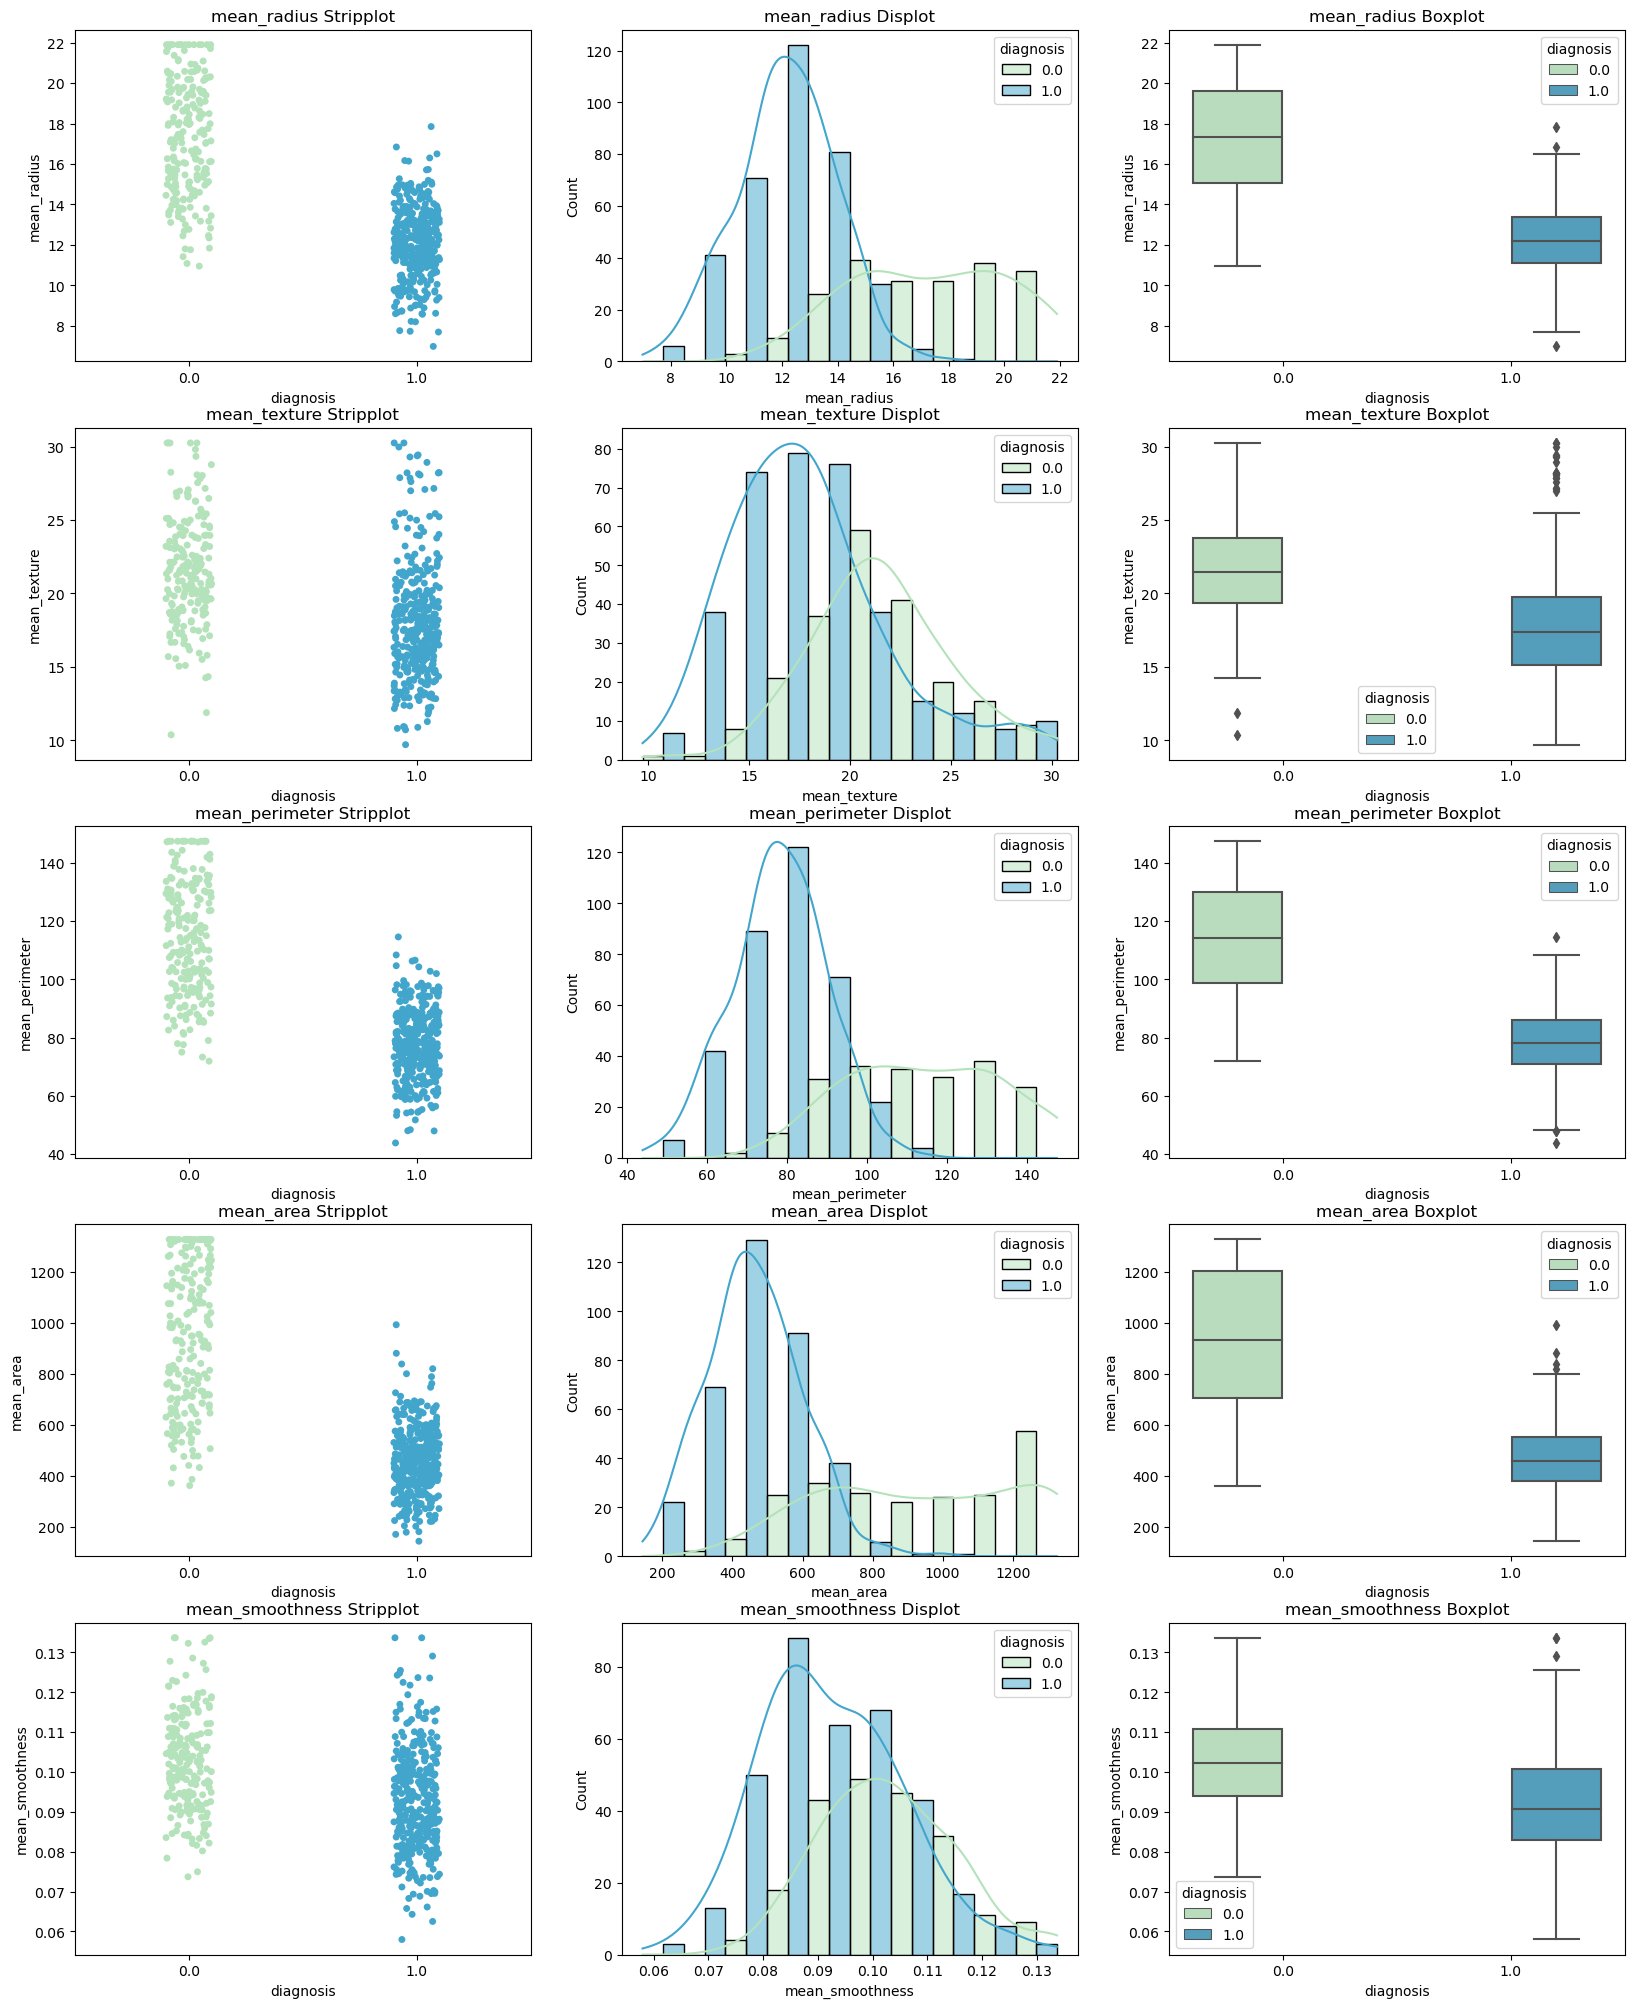

In [17]:
fig, axes = plt.subplots(5, 3, figsize=(20,25))
for i, col in zip(range(5), cols):
    sns.stripplot(ax=axes[i][0], x='diagnosis', y=col, data=bc_data, palette='GnBu', jitter=True)
    axes[i][0].set_title(f'{col} Stripplot')
    sns.histplot(ax=axes[i][1], x=col, data=bc_data, kde=True, bins=10, palette='GnBu', hue='diagnosis', multiple='dodge')
    axes[i][1].set_title(f'{col} Displot')
    sns.boxplot(ax=axes[i][2], x='diagnosis', y=col, data=bc_data, palette='GnBu', hue='diagnosis')
    axes[i][2].set_title(f'{col} Boxplot')

We notice that there are some outliers in the dataset. If outliers are not detected and handled appropriately, they can lead to overfitting, underfitting, or biased results. Let's replace the outliers with the upper and lower bounds of the interquartile range.

In [15]:
cols = list(bc_data.columns)

def outlier_limits(bc_data, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = bc_data[col_name].quantile(q1)
    quartile3 = bc_data[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_limits(bc_data, variable, q1 = 0.25, q3 = 0.75):
    low_limit, up_limit = outlier_limits(bc_data, variable, q1 = q1, q3 = q3)
    bc_data.loc[(bc_data[variable] < low_limit), variable] = low_limit
    bc_data.loc[(bc_data[variable] > up_limit), variable] = up_limit
    
for variable in cols:
    replace_with_limits(bc_data, variable)

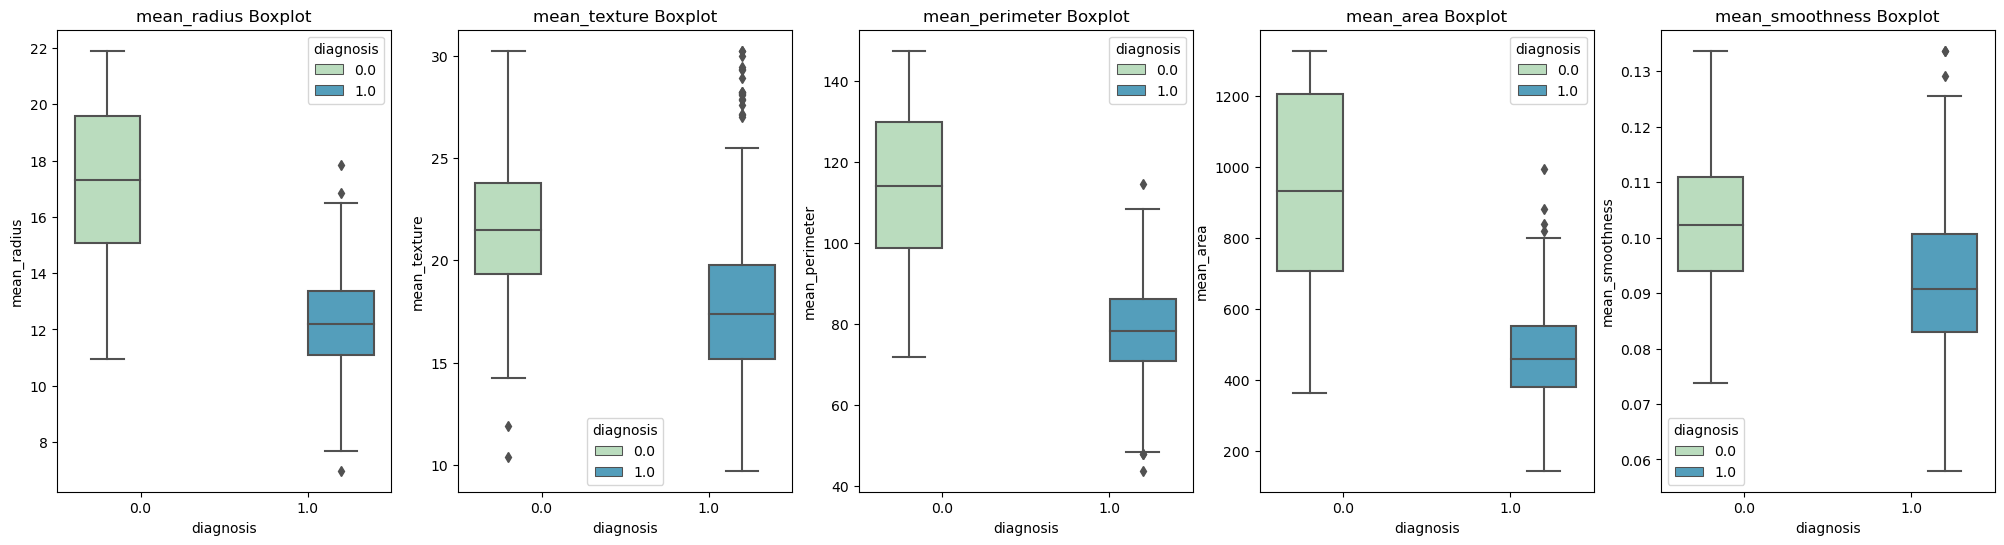

In [16]:
fig, axes = plt.subplots(1, 5, figsize=(25,6))
for i, col in zip(range(5), cols):
    sns.boxplot(ax=axes[i], x='diagnosis', y=col, data=bc_data, palette='GnBu', hue='diagnosis')
    axes[i].set_title(f'{col} Boxplot')

### Preprocessing

We will now perform feature scaling using the Min-Max scaling technique and then creating subsets of the data for supervised machine learning purposes.

For the given dataset, which contaisn measurements related to breast cancer diagnosis, the features have different units and ranges. Min-Max scaling would help ensure that each feature contributes proportionally to the overall analysis and that the model's performance is not dominated by features with larger magnitudes

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bc_scaled = pd.DataFrame(scaler.fit_transform(bc_data), columns=cols)
bc_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,0.737918,0.032627,0.761873,0.724975,0.798006,0.0
1,0.910852,0.392501,0.859264,0.999746,0.353473,0.0
2,0.851867,0.561967,0.831300,0.895756,0.681788,0.0
3,0.297540,0.519601,0.325828,0.205107,1.000000,0.0
4,0.892084,0.225469,0.880478,0.975228,0.558967,0.0


In [20]:
X = bc_scaled.iloc[:,:5]
y = bc_scaled['diagnosis']
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,0.737918,0.032627,0.761873,0.724975,0.798006
1,0.910852,0.392501,0.859264,0.999746,0.353473
2,0.851867,0.561967,0.831300,0.895756,0.681788
3,0.297540,0.519601,0.325828,0.205107,1.000000
4,0.892084,0.225469,0.880478,0.975228,0.558967


The X contains the first five columns of the scaled DataFrame (df_scaled). These columns are to be the input features for our models.
On the other hand, the y contains the 'diagnosis' column of the scaled DataFrame. This column is to be the target variable for our models.

### Classification Models

We will now split the dataset into training and testing.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bc_scaled, y, test_size=0.25, random_state=42, stratify=y)

d1_train_df = X_train
d1_train_y = y_train

d1_train_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
517,0.865272,0.513757,0.836122,0.905056,0.603870,0.0
287,0.396072,0.166058,0.367388,0.314846,0.152866,1.0
25,0.680944,0.325785,0.696302,0.650321,0.800647,0.0
253,0.691668,0.358899,0.667374,0.663426,0.565571,0.0
369,1.000000,0.593621,0.997155,1.000000,0.638207,0.0


In [28]:
d1_train_y

517    0.0
287    1.0
25     0.0
253    0.0
369    0.0
      ... 
184    0.0
300    0.0
509    0.0
230    0.0
110    1.0
Name: diagnosis, Length: 426, dtype: float64

In [29]:
d1_test_df = X_test
d1_test_y = y_test

d1_test_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
519,0.386688,0.340394,0.373367,0.296162,0.720087,1.0
408,0.737918,0.533236,0.713659,0.717112,0.602549,0.0
291,0.534821,0.457268,0.513379,0.459757,0.421883,1.0
518,0.395402,0.414414,0.392074,0.295570,0.842908,1.0
385,0.510691,0.661310,0.483873,0.440649,0.380943,0.0


In [30]:
d1_test_y

519    1.0
408    0.0
291    1.0
518    1.0
385    0.0
      ... 
542    1.0
266    1.0
310    1.0
123    1.0
96     1.0
Name: diagnosis, Length: 143, dtype: float64